In [1]:
'''Import packages'''
from qiskit.quantum_info import Pauli, SparsePauliOp

import numpy as np
import matplotlib.pyplot as plt
import math

import spontaneous_collapse_model #My module

## Dynamic evolution of one single qubit (spin 1/2 particle)

First we show the evolution of a spin-1/2 particle under the hamiltonian:  
$$
\hat H = \omega\cdot\hat X 
$$
which leads to the equation:
$$
|\Psi(t)\rangle = e^{-i\hat H t}|\Psi(t_{in})\rangle
$$
We then evaluate, at each step of time evolution $\tilde t$, the expectation value: 
$$
\langle\frac{1}{2}\hat Z\rangle_{\tilde t} = \langle\Psi(\tilde t)|\frac{1}{2}\hat Z|\Psi(\tilde t)\rangle = ... = \frac{1}{2}cos(2\tilde t)
$$ 

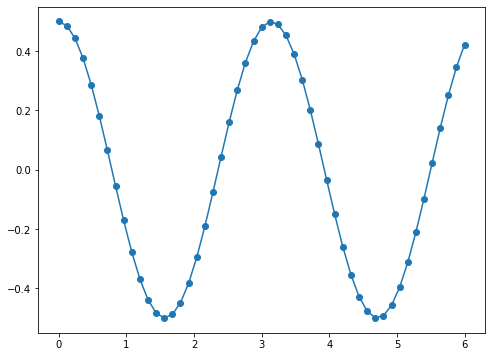

In [2]:
num_particles = 1
hamiltonian = Pauli("X")
time = 6.0  
timesteps = 50
lam = 4
sp_collapse = False  #True -> Implement the spontaneous collapse during the evolution; False -> Otherwise

evol_object = spontaneous_collapse_model.Spin_onehalf_evolution(
    num_particles,
    hamiltonian,
    time,
    timesteps,
    lam,
    sp_collapse = sp_collapse
)

if not sp_collapse:
    obs, collapse_times = evol_object._evolution_problem_init()
    evol_object.evolution(obs, collapse_times)
else:
    obs, collapse_times = evol_object._evolution_problem_init()
    


Now we implent the spontaneus collapse model.  
The time instants of collapse are Poisson distributed, so we define them by such distribution:

Now we show the evolution and again the expectation values $\langle\frac{1}{2}\hat Z\rangle_{\tilde t}$:

In [6]:
'''In order to implement the spontaneus collapse model, we have to define
the TimeEvolutionProblem and TrotterQRTE classes at the beginning and after
each spontaneous collapse occured, with the current initial state after this collapse!'''

'''At the end of each problem, evaluate the statevector.
Chooce if the state collapse sponaneously to |0> or |1> according to their probabilities,
i.e. the square modulus of the amplitudes in teh statevector!
Then set this state as initial state for the next problem.'''

'In order to implement the spontaneus collapse model, we have to define\nthe TimeEvolutionProblem and TrotterQRTE classes at the beginning and after\neach spontaneous collapse occured, with the current initial state after this collapse!'